In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 6

## Outline
- Generalization techniques
- Metrics

## Generalization techniques

**Goal**: Increase network's performance on unseen data and avoid overfitting on training data (**function approximation**)

You have seen five techniques:
1. Early Stopping
2. Data Augmentation
3. Regularization
4. Ensemble learning
5. Dropout

### Early Stopping
= Stop when reaching a plateau and/ or witnessing increase in validation loss

**Python implementation:**

In [5]:
# Source: https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch

class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

### Data Augmentation
= Artifically increase the amount of training data by using existing data

- Simple techniques: 

<img src="augmentation_simple.jpg" alt="Drawing" style="width: 650px;"/>

- More advanced techniques:

<img src="augmentation_advanced.jpg" alt="Drawing" style="width: 650px;"/>

**PyTorch Implementation**:

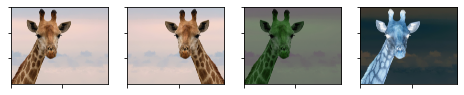

In [14]:
import torch
from torchvision import transforms
from PIL import Image

img = Image.open('giraffe.png')

## See for more examples: 
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html
flip = transforms.RandomHorizontalFlip(p=1)
jitter = transforms.ColorJitter(brightness=.5, hue=.3)
invert = transforms.RandomInvert(p=1)

# apply above defined transform to input image
img_list = [img]
img_list.append(flip(img))
img_list.append(jitter(img))
img_list.append(invert(img))

fig, ax = plt.subplots(nrows=1, ncols=len(img_list), figsize=[8,8])
                       
for i, axi in enumerate(ax.flat):
    axi.imshow(img_list[i])
    axi.set_yticklabels([])
    axi.set_xticklabels([])

plt.show()

### Regularization 
= Bound or penalize your weights, e.g. by a quadratic penalty

- **Popular approach:** weight decay

$$ E(\theta) = \sum_j{\lVert \mathcal{N}(x_j, \theta) -y_j  \rVert} + \gamma \lVert \theta \rVert ^ 2$$ 

**PyTorch Implementation**

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)

AttributeError: model

### Ensemble Learning

= average results of different classifiers (different training algorithms, initializations, loss functions, or even different architectures)

**Idea:** “Wisdom of the crowds”
- A single individual cannot know everything
- But together, a group of individuals knows a lot

**Prerequisite:** Independent learners!
- If errors have little correlation, your results will improve! 

**PyTorch Implementation:**

In [17]:
class DeepNet(nn.Module):
    def __init__(self):
        self.layers = nn.Sequential(nn.Linear(10, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Linear(100, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Linear(100, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Linear(100, 10, bias=False)
                                   )
    def forward(self, x):
        return self.layers(x)
    
class LinearNet(nn.Module):
    def __init__(self):
        self.layer = nn.Linear(10, 10, bias=False)
        
    def forward(self, x):
        return self.layer(x)

class EnsembleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(20, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Linear(100, 10, bias=False),
                                    )
    
    def forward(self, x):
        return self.layers(x)

nn = DeepNet()
linclf = LinearNet()
    
nn_output = nn.forward(x)
linclf_output = linclf.foward(x)

combined_output = np.concatenate((nn_output, linclf_output), axis=1)  
    
nn_ensemble = EnsembleNet()
final_output = nn_ensemble.forward(combined_output)

AttributeError: cannot assign module before Module.__init__() call

### Dropout

= Randomly set neurons to zero ("turn off") during training 

**Intuition:**
- learn redundant representations (learn to make right prediction even if not all features are present)

**PyTorch Implementation:**

In [18]:
class DeepNetDropout(nn.Module):
    def __init__(self):
        self.layers = nn.Sequential(nn.Linear(10, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Linear(100, 100, bias=False),
                                    nn.ReLU(),
                                    nn.Dropout(0.5)
                                    nn.Linear(100, 10, bias=False)
                                   )
    def forward(self, x):
        return self.layers(x)

SyntaxError: invalid syntax (1834108814.py, line 8)

## Metrics

### Four Outcomes of a Classification

Given a binary prediction example (1/0):

- **True Positive (TP)**: the prediction and ground truth label are both 1.
- **False Positive (FP)**: the predicition is falsely 1, even though the ground truth is 0.
- **True Negative (TN)**: the predicition is falsely 0, even though the ground truth label is of label is 1.
- **False Negative (FN)**: the prediction and ground truth label are both 0.

**For a multiclass problem:** can be calculated per class (1 = class of interest, 0 = all other classes). TP, FP, TN and FN would need to be calculated for all classes.

<img src="binary_confusion.jpg" alt="Drawing" style="width: 300px;"/>

### Accuracy

= Fraction of instances correctly predicted out of all instances in your dataset:

$$\text{accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}$$

### Precision

= Fraction of instances which were correctly predicted to be positive out of all instances which were predicted as positive:

$$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

### Recall (sensitivity)

= Fraction of instances which were correclty predicted to be positive out of all ground truth positive instances:

$$\text{recall} =\frac{\text{TP}}{\text{TP} + \text{FN}}$$

### Specitivity

= Fraction of instances which were correclty predicted to be negative out of all ground truth negative instances:


$$\text{specitivity} =\frac{\text{TN}}{\text{TN} + \text{FP}}$$

### F1-score

= Combines both recall and precision into one measure (harmonic mean):

$$\text{F1-score} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

### Confusion Matrix

<img src="multi_confusion.jpg" alt="Drawing" style="width: 300px;"/>

**Question:** Decide for the following use cases which measure (recall, precision or F1-score) might be more relevant to optimise on:

- Diagnosis of Cancer
- Spam Filtering
- Marketing Calls for Potential Customers
- Pedestrian Detection during Autonomous Driving

**Take-Home Assignment:** Implement Accuracy, Recall, Precision, Sensitivity and F1-Score on your own!

In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    y_act = pd.Series(y_act)
    y_pred = pd.Series(y_pred)
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

def compute_metrics(actual, predicted):
    # calculate the number of tp, fp, tn, fn
    tp, tn, fp, fn = compute_tp_tn_fn_fp(actual, predicted)
    # calculate the precision value (hint: multiply by 100 to get nice percentage values)
    acc = (tp + tn) / (tp + fp + tn + fn) * 100
    prec = tp / (tp + fp) * 100
    rec = tp / (tp + fn) * 100
    sens = tn / (tn + fp) * 100
    f1 = 2 * ((rec * prec) / (rec + prec))

    print('Accuracy: {}%; Precision: {}%; Recall: {}%; Sensitivity: {}%; F1-Score: {}%'.format(prec, prec, rec, sens, f1))

In [ ]:
ground_truth = [1, 1, 1, 0, 0, 0, 1, 1, 0, 1]
predictions = [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]

compute_metrics(ground_truth, predictions)